<a href="https://colab.research.google.com/github/joheras/MusicaCatedralStoDomingoIER/blob/main/Notebooks/Sacar_Musica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicación para sacar la música de los pentagramas
Aquí trataremos los pentagramas de forma individual. Más adelante la idea será sacar de golpe la música de los pentagramas de una misma obra.

## Librerías

In [1]:
import cv2
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics
import random
import sys
import os
import music21 as m21

## Implementación de funciones

In [2]:
def verPagina(num_obra):
  for cla in ini_Obras:
    if num_obra in ini_Obras[cla]: return cla

In [3]:
def borrarTexto(foto,numPag):
  n = len(texto[numPag]['text'])
  foto2 = foto.copy()
  for i in range(0,n):
    x = texto[numPag]['left'][i]
    y = texto[numPag]['top'][i]
    h = texto[numPag]['height'][i]
    w = texto[numPag]['width'][i]
    cv2.rectangle(foto2, (x-150, y-2), (x + w + 150, y + h+2), (255, 255, 255), -1)
  return foto2

## Preparando los datos

In [4]:
%%capture
!wget https://www.dropbox.com/s/u2ekoltvu35kfjw/Fotos.zip?dl=1 -O Fotos.zip

In [5]:
%%capture
!unzip Fotos.zip

In [6]:
with open("texto.pickle", "rb") as f:
    texto = pickle.load(f)
with open("pentagramas2.pickle", "rb") as f:
    pentagramas2 = pickle.load(f)
with open("ini_Obras.pickle", "rb") as f:
    ini_Obras = pickle.load(f)
with open("Obras_final.pickle", "rb") as f:
    Obras_final = pickle.load(f)
with open("Obras.pickle", "rb") as f:
    Obras = pickle.load(f)

**Mostrar un pentagrama aleatorio**

In [7]:
claves = [cla for cla in pentagramas2]
print(claves)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 

In [8]:
Pagina = {}
for cla in claves:
  foto = cv2.imread('Fotos/pag'+str(cla)+'.jpg')
  foto = cv2.cvtColor(foto,cv2.COLOR_BGR2RGB)
  Pagina[cla] = foto

- **Mostrar un pentagrama aleatorio**

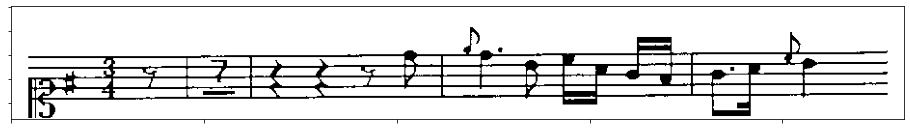

In [10]:
cla = random.choice(claves)
pag = cv2.imread('Fotos/pag' + str(cla) + '.jpg')
pag = cv2.cvtColor(pag,cv2.COLOR_BGR2RGB)
i = random.choice(range(len(pentagramas2[cla])))
x,y,w,h = pentagramas2[cla][i]
pent = borrarTexto(pag,cla)[y:y+h,x:x+w]
pent  = cv2.cvtColor(pent,cv2.COLOR_RGB2GRAY)
_,pent=cv2.threshold(pent, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(pent,cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Mostrar una obra aleatoria**

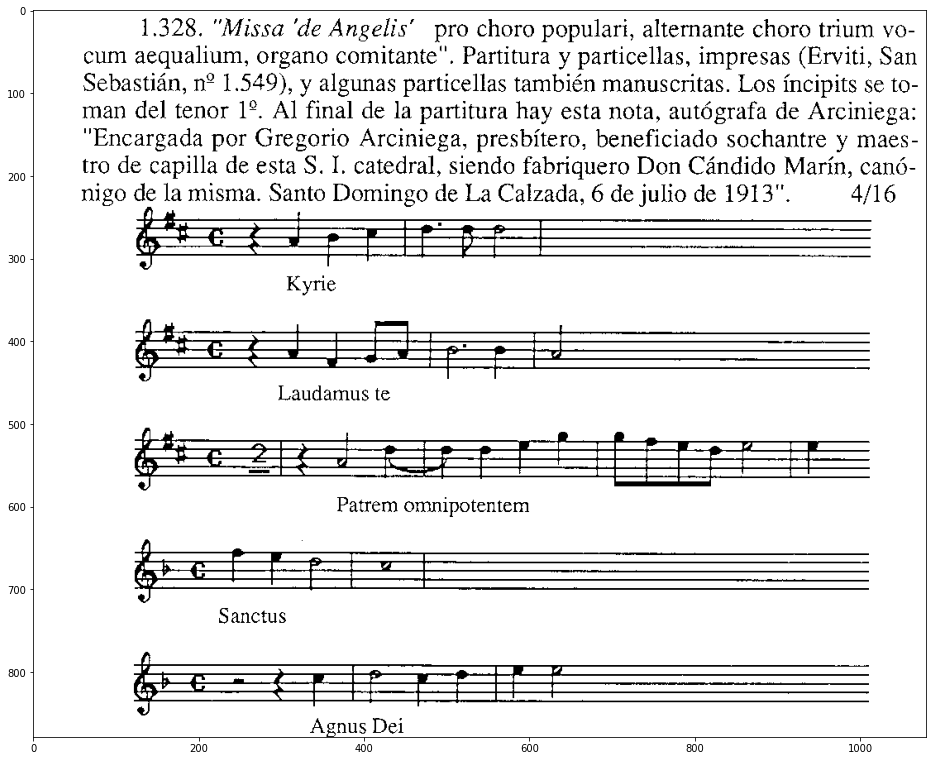

In [18]:
i = random.choice(range(1,1554))
Foto = []
pag = verPagina(i)
n = len(Obras[i])
for j in range(0,n):
  x,y,w,h = Obras[i][j]
  Foto.append(Pagina[pag+j][y:y+h,x:x+w])
Foto = np.concatenate(Foto,axis=0)
Foto  = cv2.cvtColor(Foto,cv2.COLOR_RGB2GRAY)
T,Foto = cv2.threshold(Foto, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(Foto,cmap=plt.cm.binary)
plt.show()

- **Quitar pentagramas**

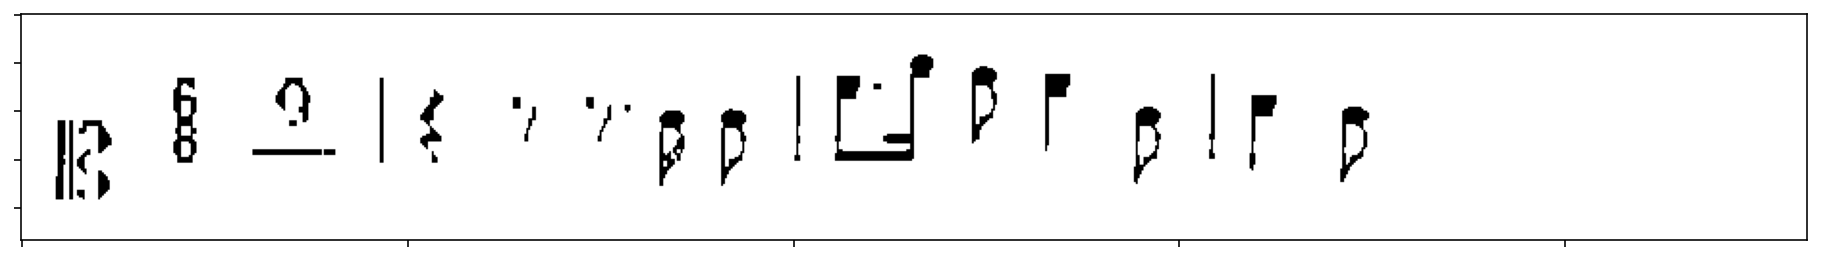

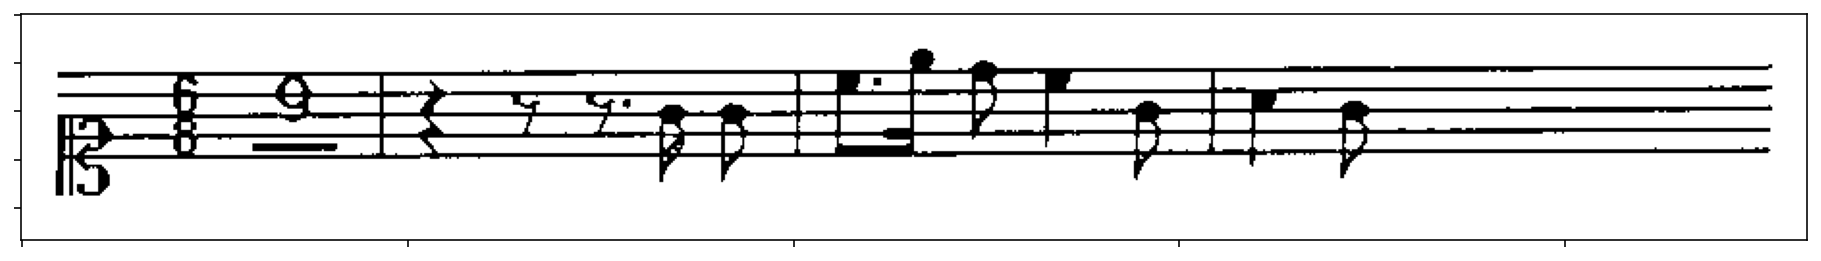

In [125]:
pag = pent.copy()
for i in range(0,3):
  pag = cv2.erode(pag,(1,1))
for i in range(0,2):
  pag = cv2.dilate(pag,(1,1))
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(pag,cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(pent,cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Probamos una representación dada por un repositorio de git hub**

In [9]:
sum([len(pentagramas2[cla]) for cla in claves])

2308

In [10]:
%cd /content/input
k = 1
for cla in claves:
  for i in range(0,len(pentagramas2[cla])):
    x,y,w,h = pentagramas2[cla][i]
    pent = borrarTexto(Pagina[cla],cla)[y:y+h,x:x+w]
    pent  = cv2.cvtColor(pent,cv2.COLOR_RGB2GRAY)
    _,pent=cv2.threshold(pent, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    cv2.imwrite('pent' + str(k) + '.jpg',255-pent)
    k+=1

/content/input


In [11]:
%cd /content/output
for i in range(1,2309):
  open("pent" + str(i) + '.txt', "wb")

/content/output


In [12]:
%cd /content
!git clone https://github.com/aashrafh/Mozart.git

/content
Cloning into 'Mozart'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 901 (delta 16), reused 26 (delta 2), pack-reused 832
Receiving objects: 100% (901/901), 359.13 MiB | 19.90 MiB/s, done.
Resolving deltas: 100% (171/171), done.


In [13]:
%cd Mozart/src

/content/Mozart/src


In [ ]:
%%capture
!python main.py /content/input /content/output